Player Performance

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

Player performance graph

Part 1:Regression Model for FGA_PG (Field Goals Attempted Per Game)

In [198]:
dataset = pd.read_csv("merged.csv")
print(dataset.columns)

Index(['PLAYER_ID', 'PLAYER_NAME', 'SEASON', 'SEASON_NUM', 'AGE',
       'PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT', 'GP', 'MIN', 'USG_PCT', 'PACE',
       'POSS', 'FGA_PG', 'DRIVES', 'DRIVE_FGA', 'DRIVE_PASSES', 'DIST_MILES',
       'AVG_SPEED', 'PULL_UP_FGA', 'PULL_UP_FG3A', 'TOUCHES',
       'FRONT_CT_TOUCHES', 'AVG_SEC_PER_TOUCH', 'AVG_DRIB_PER_TOUCH',
       'ELBOW_TOUCHES', 'POST_TOUCHES', 'PAINT_TOUCHES', 'TEAM', 'INJURED ON',
       'RETURNED', 'DAYS MISSED', 'INJURED_TYPE'],
      dtype='object')


In [199]:
features = ['AGE', 'PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT', 'GP', 'MIN', 'USG_PCT', 'PACE',
    'POSS', 'DRIVES', 'DRIVE_FGA', 'DRIVE_PASSES', 'DIST_MILES',
    'AVG_SPEED', 'PULL_UP_FGA', 'PULL_UP_FG3A', 'TOUCHES',
    'FRONT_CT_TOUCHES', 'AVG_SEC_PER_TOUCH', 'AVG_DRIB_PER_TOUCH',
    'ELBOW_TOUCHES', 'POST_TOUCHES', 'PAINT_TOUCHES']
target = 'FGA_PG'
X = dataset[features].values
X = X.tolist()
for i in range(len(X)):
    for j in range(len(X[i])):
        if(X[i][j] ==' None'):
            X[i][j] = 0
        if(type(X[i][j]) == str):
            X[i][j] = float(X[i][j])
X = np.array(X)
y = dataset[target].values
y = y.tolist()
for i in range(len(y)):
    if(y[i] ==' None'):
        y[i] = 0
y = np.array(y)

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Used Regression model as it showed the best accuracy score

In [201]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [202]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.9895875479835672

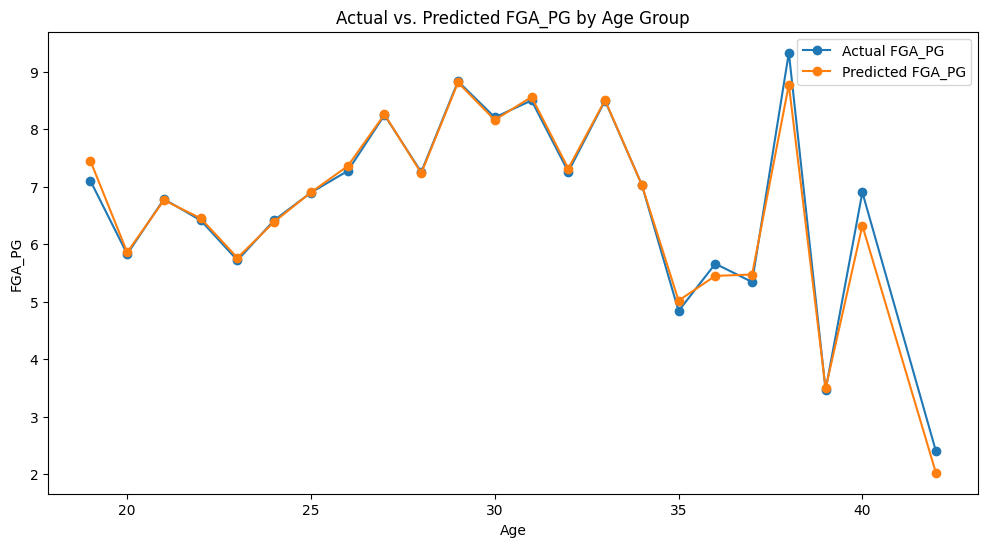

In [203]:
results_df = pd.DataFrame({'Actual_FGA_PG': y_test, 'Predicted_FGA_PG': y_pred, 'AGE': X_test[:,0]})
age_group_means = results_df.groupby('AGE').mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(age_group_means['AGE'], age_group_means['Actual_FGA_PG'], label='Actual FGA_PG', marker='o')
plt.plot(age_group_means['AGE'], age_group_means['Predicted_FGA_PG'], label='Predicted FGA_PG', marker='o')
plt.xlabel('Age')
plt.ylabel('FGA_PG')
plt.title('Actual vs. Predicted FGA_PG by Age Group')
plt.legend()
plt.show()


Part 2:Clustering for Playing Style

In [204]:
features = ['FGA_PG', 'AVG_SPEED', 'PULL_UP_FGA']
X = dataset[features].values
X = X.tolist()
for i in range(len(X)):
    for j in range(len(X[i])):
        if(X[i][j] ==' None'):
            X[i][j] = 0
        if(type(X[i][j]) == str):
            X[i][j] = float(X[i][j])
X = np.array(X)

c:\Users\Subhronil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Subhronil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Subhronil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Subhronil\AppData\Local\Programs\Python\Python311\Lib\site-packa

[]

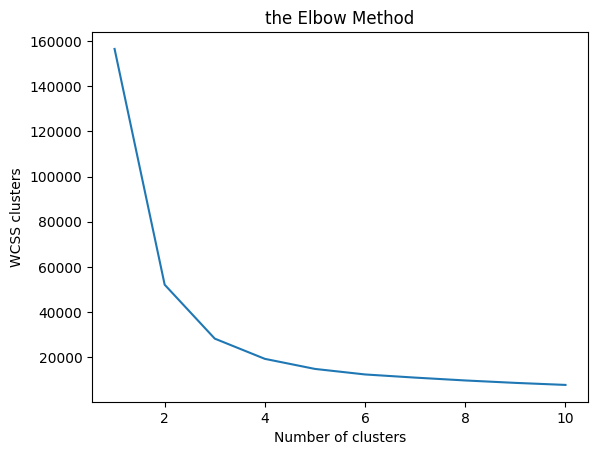

In [205]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS clusters')
plt.plot()

In [206]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

c:\Users\Subhronil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


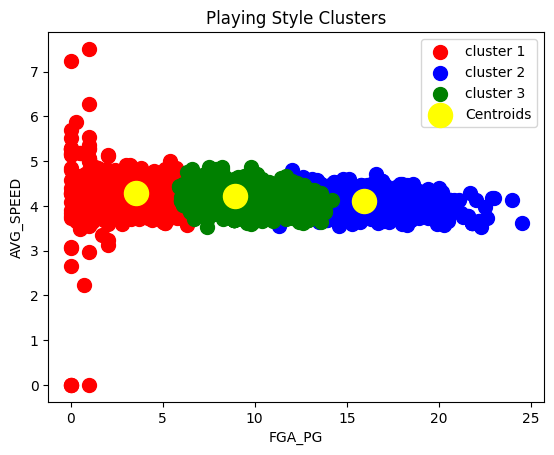

In [207]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Playing Style Clusters')
plt.xlabel('FGA_PG')
plt.ylabel('AVG_SPEED')
plt.legend()
plt.show()

Part 3: Player Contribution to Team Success

In [211]:

features = [
    'GP', 'MIN', 'USG_PCT', 'PACE', 'POSS', 'FGA_PG', 'DRIVES',
    'DRIVE_FGA', 'DRIVE_PASSES', 'DIST_MILES', 'AVG_SPEED', 'PULL_UP_FGA',
    'PULL_UP_FG3A', 'TOUCHES', 'FRONT_CT_TOUCHES', 'AVG_SEC_PER_TOUCH',
    'AVG_DRIB_PER_TOUCH', 'ELBOW_TOUCHES', 'POST_TOUCHES', 'PAINT_TOUCHES'
]
dataset.replace(' None', 0.0, inplace=True)
dataset = dataset.apply(pd.to_numeric, errors='coerce')
dataset['Player_Contribution_Score'] = (
    0.5 * dataset['GP'] + 0.3 * dataset['MIN'] + 0.2 * dataset['USG_PCT']
    + 0.1 * dataset['PACE'] + 0.2 * dataset['FGA_PG'] - 0.1 * dataset['DRIVES']
    + 0.3 * dataset['DIST_MILES'] + 0.4 * dataset['AVG_SPEED']
)
X = dataset[features]
y = dataset[target]


In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
mse = mean_squared_error(y_test, regression_model.predict(X_test))

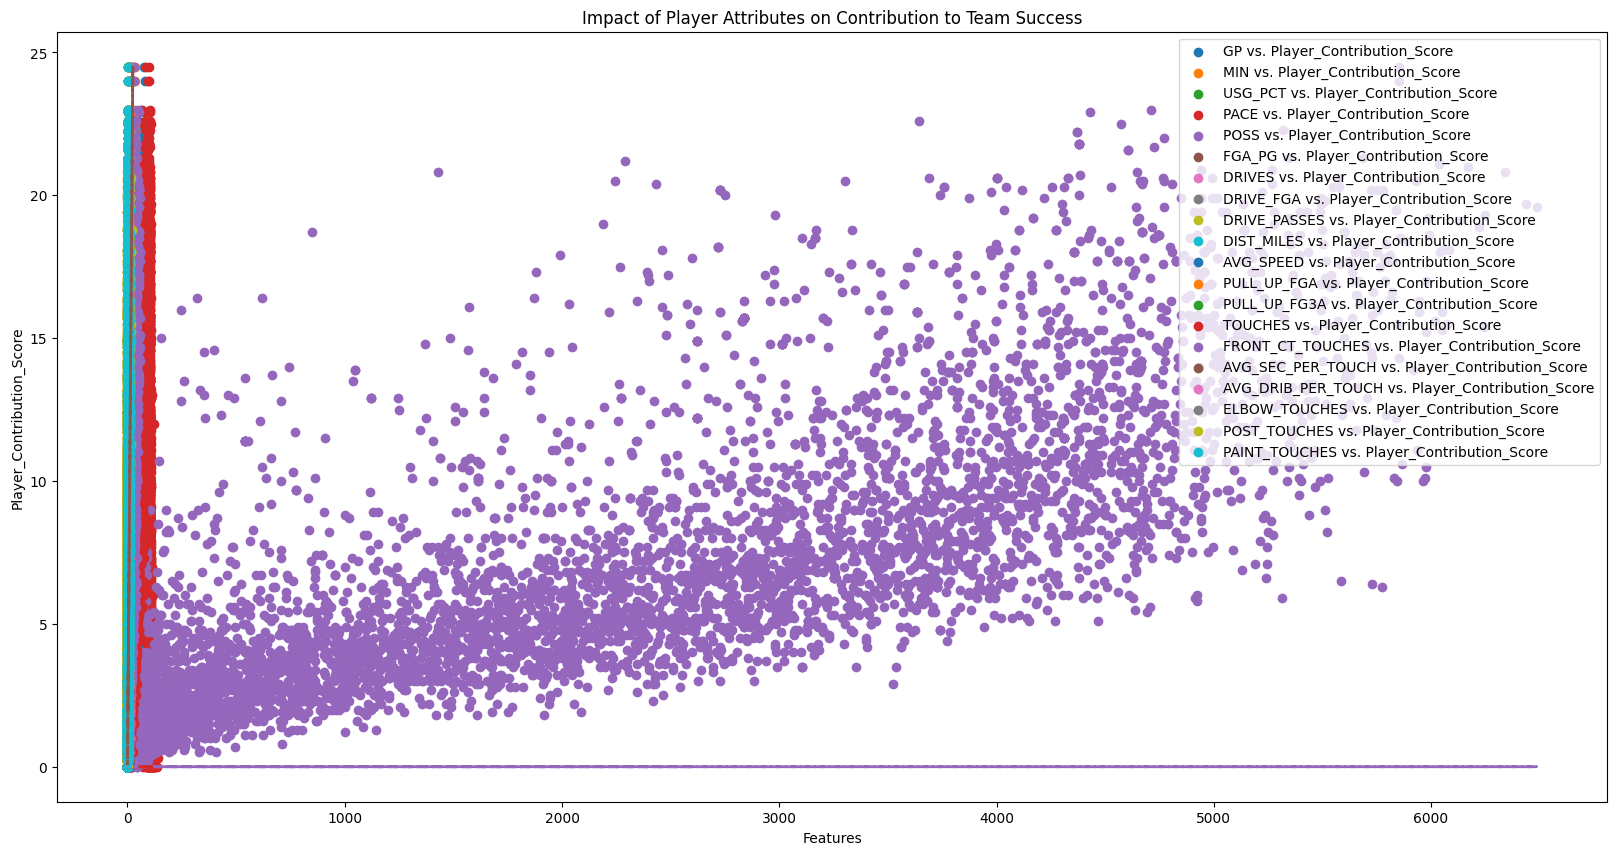

In [218]:
plt.figure(figsize=(20, 10))
for feature in features:
    plt.scatter(X[feature], y, label=f'{feature} vs. Player_Contribution_Score', alpha=0.9999)
    coef = regression_model.coef_[features.index(feature)]
    plt.plot(X[feature], regression_model.intercept_ + coef * X[feature], linestyle='--', linewidth=2)

plt.xlabel('Features')
plt.ylabel('Player_Contribution_Score')
plt.title('Impact of Player Attributes on Contribution to Team Success')
plt.legend()
plt.show()